# Making networkx graphs from source-target DataFrames

### Imports/setup

Let's just get all of this out of the way up top.

In [1]:
%matplotlib inline

import pandas as pd
import networkx as nx

# Ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

## Let's deal with our data!

### First, read it in as a normal dataframe

In [2]:
df = pd.read_csv("clubs.csv")
df.head()

,name,club
0,Adams John,North Caucus
1,Adams John,Long Room Club
2,Adams Samuel,North Caucus
3,Adams Samuel,Long Room Club
4,Adams Samuel,Boston Committee


### Convert it to a graph

Each row is an **edge** with a **source** and a **target**. The network will automatically create nodes for you based on their names.

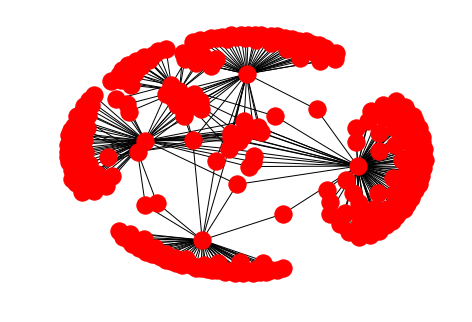

In [3]:
g = nx.from_pandas_dataframe(df, source='name', target='club') 
nx.draw(g)

Horrifying. What if I wanted to build one **where I highlighted the clubs?**

## Let's build a nice visualization

It's going to take a little work and a few list comprehensions, but we'll be okay!

In [4]:
# Make a list of the clubs, we'll use it later
clubs = list(df.club.unique())
clubs

['North Caucus',
 'Long Room Club',
 'Boston Committee',
 'London Enemies',
 'St Andrews Lodge',
 'Loyal Nine',
 'Tea Party']

In [10]:
people = list(df.name.unique())
people

['Adams John',
 'Adams Samuel',
 'Allen Dr',
 'Appleton Nathaniel',
 'Ash Gilbert',
 'Austin Benjamin',
 'Austin Samuel',
 'Avery John',
 'Baldwin Cyrus',
 'Ballard John',
 'Barber Nathaniel',
 'Barnard Samuel',
 'Barrett Samuel',
 'Bass Henry',
 'Bell William',
 'Blake Increase',
 'Boit John',
 'Bolter Thomas',
 'Boyer Peter',
 'Boynton Richard',
 'Brackett Jos',
 'Bradford John',
 'Bradlee David',
 'Bradlee Josiah',
 'Bradlee Nathaniel',
 'Bradlee Thomas',
 'Bray George',
 'Breck William',
 'Bewer James',
 'Brimmer Herman',
 'Brimmer Martin',
 'Broomfield Henry',
 'Brown Hugh',
 'Brown Enoch',
 'Brown John',
 'Bruce Stephen',
 'Burbeck Edward',
 'Burbeck William',
 'Burt Benjamin',
 'Burton Benjamin',
 'Cailleteau Edward',
 'Callendar Elisha',
 'Campbell Nicholas',
 'Cazneau Capt',
 'Chadwell Mr',
 'Champney Caleb',
 'Chase Thomas',
 'Cheever Ezekiel',
 'Chipman Seth',
 'Chrysty Thomas',
 'Church Benjamin',
 'Clarke Benjamin',
 'Cleverly Stephen',
 'Cochran John',
 'Colesworthy Gilbe

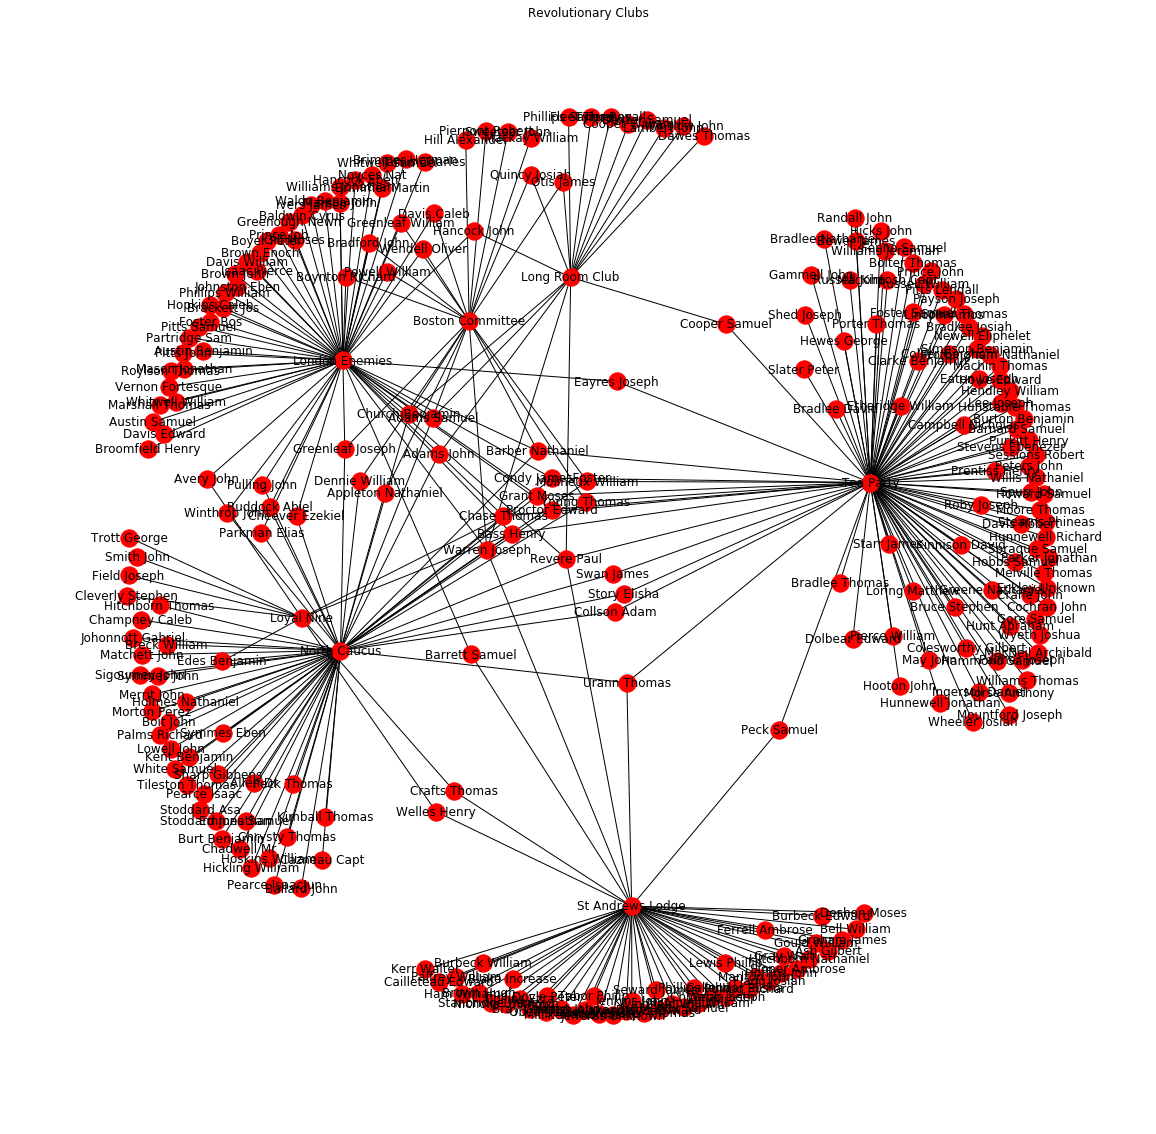

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# 1. Create the graph
g = nx.from_pandas_dataframe(df, source='name', target='club') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color
nx.draw_networkx_nodes(g, layout)
nx.draw_networkx_edges(g, layout)
nx.draw_networkx_labels(g, layout)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

In [19]:
dict(zip(clubs, clubs))

{'Boston Committee': 'Boston Committee',
 'London Enemies': 'London Enemies',
 'Long Room Club': 'Long Room Club',
 'Loyal Nine': 'Loyal Nine',
 'North Caucus': 'North Caucus',
 'St Andrews Lodge': 'St Andrews Lodge',
 'Tea Party': 'Tea Party'}

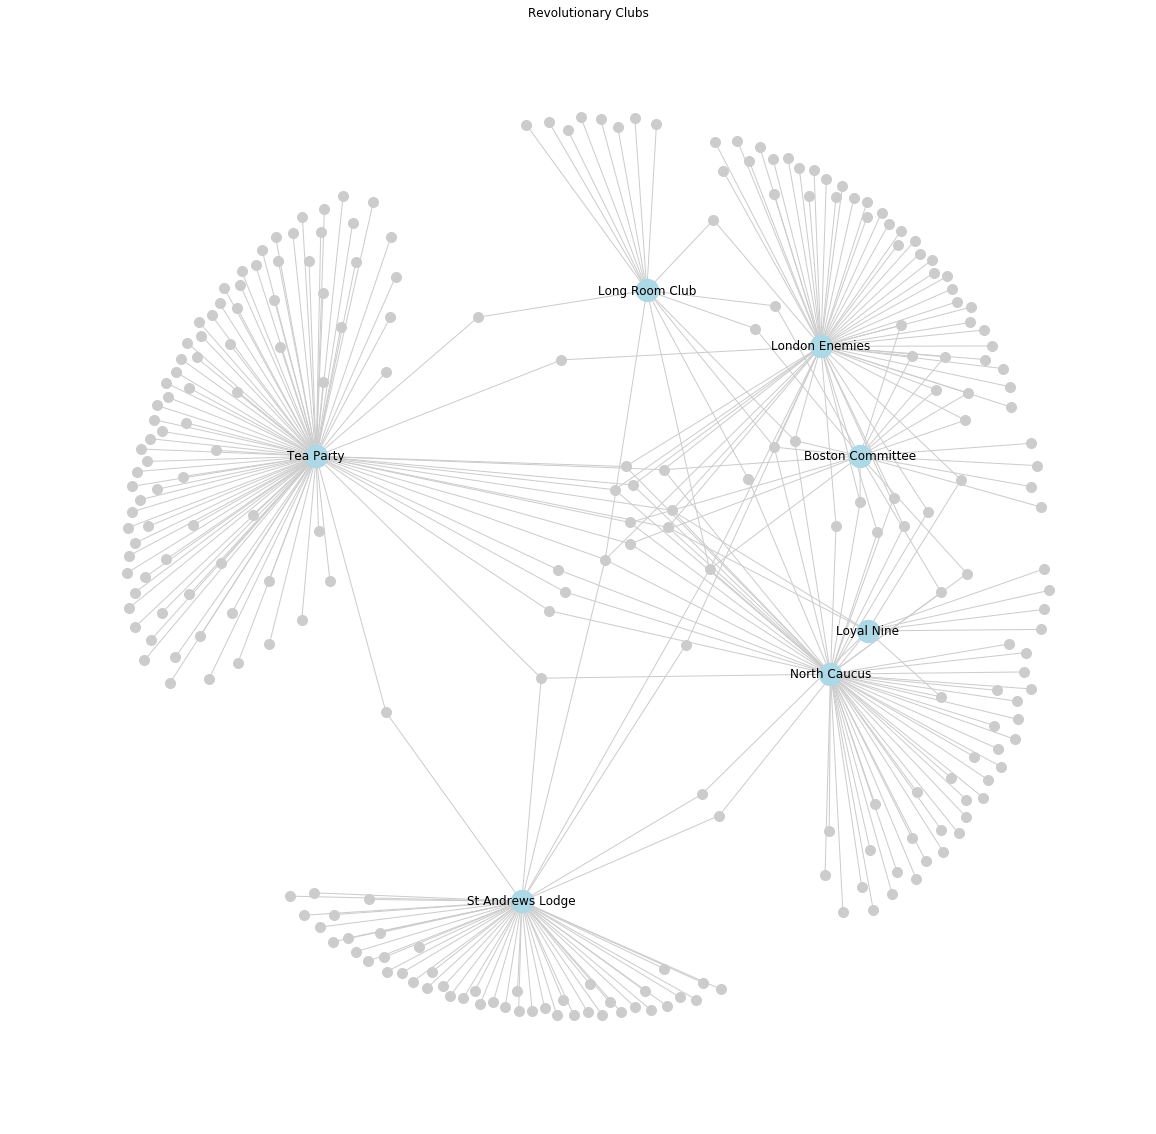

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# 1. Create the graph
g = nx.from_pandas_dataframe(df, source='name', target='club') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_color="lightblue", node_size=500)
nx.draw_networkx_nodes(g, layout, nodelist=people, node_color="#cccccc", node_size=100)
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

## Final version

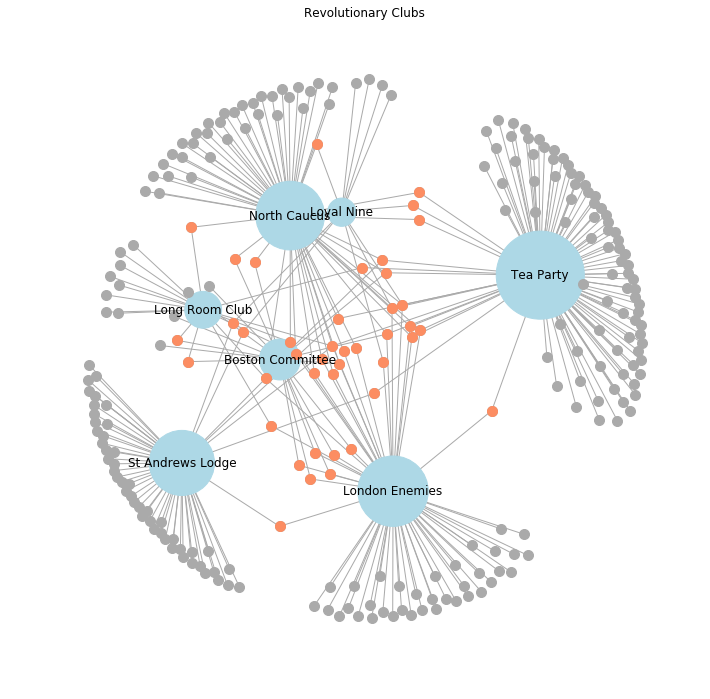

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_dataframe(df, source='name', target='club') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

clubs = [node for node in g.nodes() if node in df.club.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df.club.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, node_color='lightblue')

people = [node for node in g.nodes() if node in df.name.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in df.name.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

club_dict = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=club_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()